In [144]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy import stats

from sklearn.tree import plot_tree

In [145]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "Malgun Gothic")

# 탐색적 분석

## 1. 데이터 불러오기

In [146]:
# 데이터 불러오기
df_raww = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/SCALE불량.csv",  
                    encoding = "euc-kr")
df_raww.head(10)

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
5,PB562779,2008-08-01:00:02:06,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1143,127,1128,57,314,1120,874,적용,8,4조
6,PB562780,2008-08-01:00:02:28,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1138,126,1130,50,289,1118,878,적용,8,2조
7,PB562781,2008-08-01:00:02:21,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1139,126,1131,52,294,1119,870,적용,8,4조
8,PB562782,2008-08-01:00:02:51,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,...,1127,126,1122,52,293,1112,873,적용,8,1조
9,PB562783,2008-08-01:00:03:15,양품,COMMON,T8,38.43,3129,16187,15280,2호기,...,1135,119,1124,73,298,1110,881,적용,8,4조


In [150]:
df_raw = df_raww.drop(["PLATE_NO", "ROLLING_DATE"], axis = 1)
df_raw.tail(10)

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
710,양품,LR-AH32,C0,12.05,3095,53763,47220,2호기,2,1174,74,1159,61,238,1146,919,적용,10,2조
711,양품,LR-AH32,C0,12.05,3095,53763,47220,3호기,1,1179,65,1163,71,242,1154,913,적용,10,1조
712,양품,LR-A,C0,16.60,3528,32323,14860,3호기,2,1156,65,1160,72,244,1151,938,적용,10,1조
713,양품,NV-A32,C0,18.11,3260,40586,37620,1호기,1,1174,66,1160,71,240,1148,965,적용,10,3조
714,양품,LR-A,C0,18.92,3401,41455,20940,1호기,2,1142,55,1151,86,246,1137,948,적용,10,4조
715,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,1,1172,72,1164,62,245,1155,1005,적용,8,2조
716,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,1,1150,61,1169,61,238,1160,947,적용,10,1조
717,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,2,1169,65,1163,77,247,1152,948,적용,10,4조
718,양품,LR-A,C0,15.59,3363,48740,80240,3호기,2,1179,86,1163,45,243,1154,940,적용,10,2조
719,양품,GL-A32,C0,16.09,3400,54209,69840,3호기,1,1186,82,1169,45,239,1155,957,적용,10,2조


- 데이터 탐색을 위하여 가열로 호기에 따라 다른 다른 설명변수 카운트

In [148]:
df_raw.groupby("FUR_NO").count()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
FUR_NO,,,,,,,,,,,,,,,,,,
1호기,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
2호기,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237
3호기,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243


In [149]:
df_raw.head(10)

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1118,873,적용,8,1조
5,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,2,1143,127,1128,57,314,1120,874,적용,8,4조
6,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,1,1138,126,1130,50,289,1118,878,적용,8,2조
7,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,2,1139,126,1131,52,294,1119,870,적용,8,4조
8,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,1,1127,126,1122,52,293,1112,873,적용,8,1조
9,양품,COMMON,T8,38.43,3129,16187,15280,2호기,2,1135,119,1124,73,298,1110,881,적용,8,4조


## 2. 데이터 구성하기

In [176]:
# 양품일 때는 0, 불량일 때는 1로 구분
df_raw["SCALE"] = np.where(df_raw["SCALE"] == "양품", 0, 1)
df_raw["SCALE"] = df_raw["SCALE"].astype(object)
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1125,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1120,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1106,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1113,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1118,873,적용,8,1조


In [ ]:
# # 양품일 때는 0, 불량일 때는 1로 구분
# df_raw["SCALE"] = np.where(df_raw["SCALE"] == "양품", 0, 1)
# df_raw["SCALE"] = df_raw["SCALE"].astype(object)
# df_raw.head()

In [8]:
df_raw["FUR_NO_ROW"] = df_raw["FUR_NO_ROW"].astype(object)


#### 데이터 속성확인

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    object 
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

In [10]:
#행열 개수
df_raw.shape

(720, 19)

#### 결측치 확인

In [11]:
df_raw.isnull().sum()

SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

> 결측치는 보이지 않는다.

#### 중복된 데이터 확인

In [12]:
df_raw.duplicated().sum()

0

In [13]:
##df_raw["SCALE"].value_counts()

#### 이상치 확인

In [14]:
df_raw.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


<AxesSubplot:>

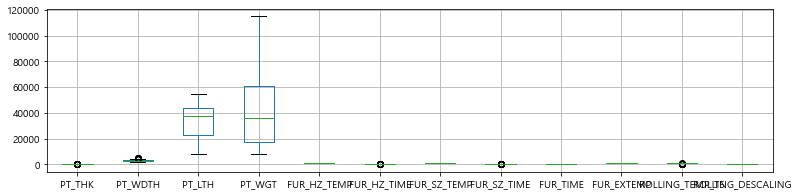

In [15]:
df_raw.boxplot(figsize = (13, 3))

> 이상치를 확인해봤더니 PH_THICK, PH_WIDTH, FUR_HZ_TIME, FUR_SZ_TIME, ROLLING_TEMP_T5에서 속단할 수는 없지만 이상치로 보이는 값을 확인해볼 수 있다. 기술통계량으로 봤을 때 이상치가 보이긴 했는데 오류에 의한 값이라고는 생각이 들만큼 이상치가 엄청 떨어져있지 않아서 삭제를 안하고 이상치까지 다 반영을 해보려고 한다.

## 3. 그래프 분석

#### 연속형 변수의 분포 파악 : 히스토그램

In [16]:
# 연속형 변수 12개
df_num = df_raw.select_dtypes(exclude = "object")
df_num.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,8
1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,8
2,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,8
3,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,8
4,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,8


array([[<AxesSubplot:title={'center':'PT_THK'}>,
        <AxesSubplot:title={'center':'PT_WDTH'}>,
        <AxesSubplot:title={'center':'PT_LTH'}>],
       [<AxesSubplot:title={'center':'PT_WGT'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TEMP'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TIME'}>],
       [<AxesSubplot:title={'center':'FUR_SZ_TEMP'}>,
        <AxesSubplot:title={'center':'FUR_SZ_TIME'}>,
        <AxesSubplot:title={'center':'FUR_TIME'}>],
       [<AxesSubplot:title={'center':'FUR_EXTEMP'}>,
        <AxesSubplot:title={'center':'ROLLING_TEMP_T5'}>,
        <AxesSubplot:title={'center':'ROLLING_DESCALING'}>]], dtype=object)

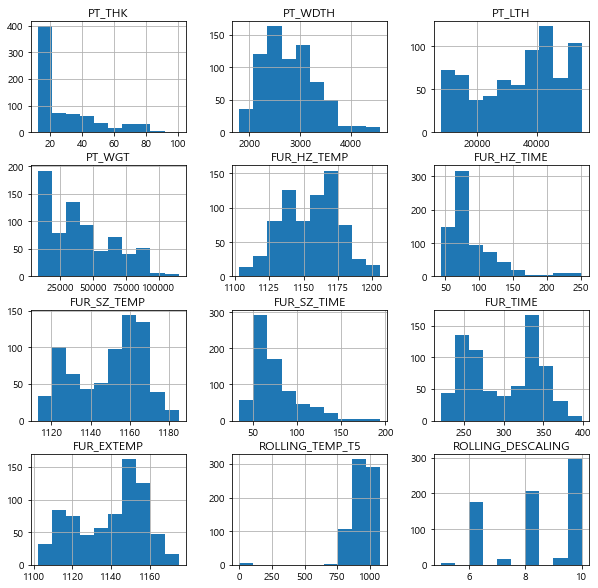

In [17]:
df_num.hist(figsize = (10, 10))

In [18]:
df_raw["ROLLING_DESCALING"].unique()

array([ 8,  5,  6, 10,  9,  7], dtype=int64)

> Plate 두께는 20 이하인 데이터 수가 다른 수치에 비해 두드러지게 많다.
  
> 가열로 가열대 시간과 균열대에 있는 시간은 대체적으로 150분 이하이다.  
  
> 압연온도가 750도 이상일 때가 데이터의 대부분인데 온도가 0에 근접할 때도 데이터가 있다. 
    이 온도는 압연온도가 0도인데 불량이나 양품이 나왔다는 것은 아마 공장이 멈춘 현상이 일어난 것이 아닐까? 의문을 제기해본다.
      
> 압연 중 Descaling 횟수는 5번 이상 10번 이하이다.  

#### 목표변수 scale의 빈도 수 / 비율 현황

<AxesSubplot:>

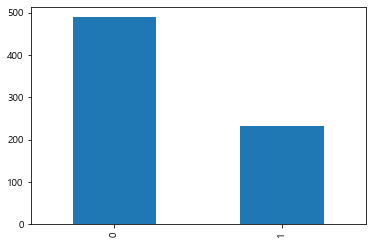

In [19]:
df_raw["SCALE"].value_counts().plot(kind='bar')

In [20]:
df_raw["SCALE"].value_counts()

0    489
1    231
Name: SCALE, dtype: int64

<AxesSubplot:ylabel='None'>

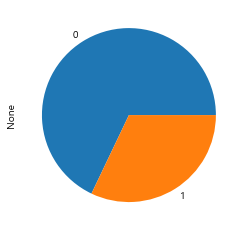

In [21]:
# 비율 
df_count = df_raw.groupby(["SCALE"]).size()
df_count.plot.pie(y = "SCALE")

> scale 불량이 일어나는 표본수는 231, 양품일 경우가 489개로 2배 이상의 표본 차이가 있다.

#### 범주형 변수에 대한 분석

- SPEC(제품 규격) - SCALE(scale 불량)

<AxesSubplot:ylabel='None'>

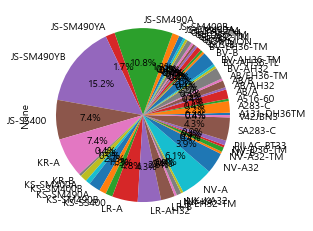

In [22]:
df_scale = df_raw[df_raw["SCALE"] == 1]
df_count = df_scale.groupby(["SPEC"]).size()
df_count.plot.pie(y = "PT_THK", autopct = "%.1f%%")

In [23]:
df_scale["SPEC"].value_counts()

JS-SM490YB     35
JS-SM490A      25
KR-A           17
JS-SS400       17
NV-A           14
LR-A           11
SA283-C        10
LR-AH32        10
NV-A32          9
BV-B            6
LR-B            6
BV-AH32         5
A283-C          5
KS-SM490A       5
JS-SM490YA      4
AB/A            4
KS-SS400        3
JS-SM400B       3
KS-SM490B       3
AB/B            3
KS-SM400A       3
KS-SM400B       2
PILAC-BT33      2
COMMON          2
NV-B            2
GL-D36-TM       2
JS-SM400A       2
NK-KA           2
GL-A32-TM       1
NV-D36-TM       1
CCS-B           1
KR-B            1
GL-E36-TM       1
A516-60         1
NK-KA32         1
BV-AH36-TL      1
AB/EH36-TM      1
NV-A32-TM       1
A131-DH36TM     1
AB/AH32         1
GL-E32-TM       1
GL-A            1
GL-A32          1
LR-EH32-TM      1
V42JBN3         1
BV-EH36-TM      1
BV-AH36-TM      1
Name: SPEC, dtype: int64

> 제품 규격에 따른 스케일 불량을 나타내보았다. 두드러지게 많은 표본은 제품 규격이 JS-SM490YB, JS-SM490A 일 때 불량이 많이 나왔다는 것을 알 수 있다. 하지만 두 규격은 전체 규격의 15%, 10%에 해당하기에 불량에 많은 영향을 주지는 않는다.

- STEEL_KIND(강종) - SCALE(scale 불량)

<AxesSubplot:ylabel='None'>

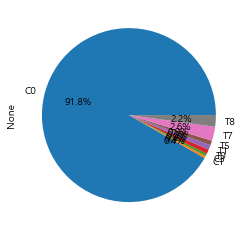

In [24]:
df_scale = df_raw[df_raw["SCALE"] == 1]
df_count = df_scale.groupby(["STEEL_KIND"]).size()
df_count.plot.pie(y = "PT_THK", autopct = "%.1f%%")

> 강종에 따른 Scale 불량은, scale 불량이 있을 때, 강종의 종류가 C0일 확률이 91.8%라는 뜻이다. 불량이 일어날 때 대부분의 강종이 C0였다는 것이다.

- FUR_NO(가열로 호기) - SCALE(scale 불량)

<AxesSubplot:ylabel='None'>

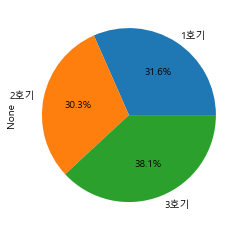

In [25]:
df_scale = df_raw[df_raw["SCALE"] == 1]
df_count = df_scale.groupby(["FUR_NO"]).size()
df_count.plot.pie(y = "PT_THK", autopct = "%.1f%%")

> Scale 불량이 일어날 때 가열호 3호기에서 불량이 일어날 확률이 나머지 둘보다 높은 것을 알 수 있다.


- FUR_NO_ROW(가열로 작업 순번) - SCALE(scale 불량)

<AxesSubplot:ylabel='None'>

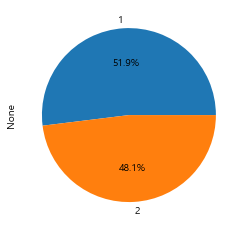

In [26]:
df_scale = df_raw[df_raw["SCALE"] == 1]
df_count = df_scale.groupby(["FUR_NO_ROW"]).size()
df_count.plot.pie(y = "PT_THK", autopct = "%.1f%%")

> scale불량이 일어날 때 가열로 작업 순번은 첫 번째나 두 번째나 큰 차이는 없지만 첫 번째일 때 상대적으로 불량일 확률이 크다.

- HSB(HSB 적용 여부) - SCALE(scale 불량)

<AxesSubplot:ylabel='None'>

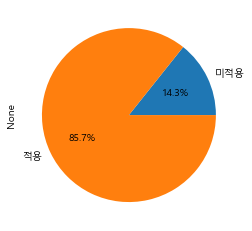

In [178]:
df_scale = df_raw[df_raw["SCALE"] == 1]
df_count = df_scale.groupby(["HSB"]).size()
df_count.plot.pie(y = "FUR_TIME", autopct = "%.1f%%")

> Scale불량이 일어났을 때 HSB를 적용했을 경우 불량일 확률이 높다. HSB는 고압수로 분사하여 scale(산화철)을 제거해주는 과정인데 scale 불량일 때 이 HSB 과정을 거쳤을 확률이 85.7%나 된다는 것이다. 보통 과정을 거쳤으면 산화철이 제거가 되었을텐데 왜 scale 불량이 많아진 것인지 잘 이해가 되지 않는다. 

- WORK_GR(작업조) - SCALE(scale 불량)

<AxesSubplot:ylabel='None'>

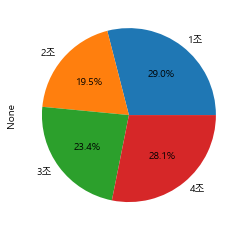

In [28]:
df_scale = df_raw[df_raw["SCALE"] == 1]
df_count = df_scale.groupby(["WORK_GR"]).size()
df_count.plot.pie(y = "PT_THK", autopct = "%.1f%%")

> Scale 불량일 때 1조가 작업한 경우의 확률이 가장 높다.

#### 연속형 변수간 선형관계 확인

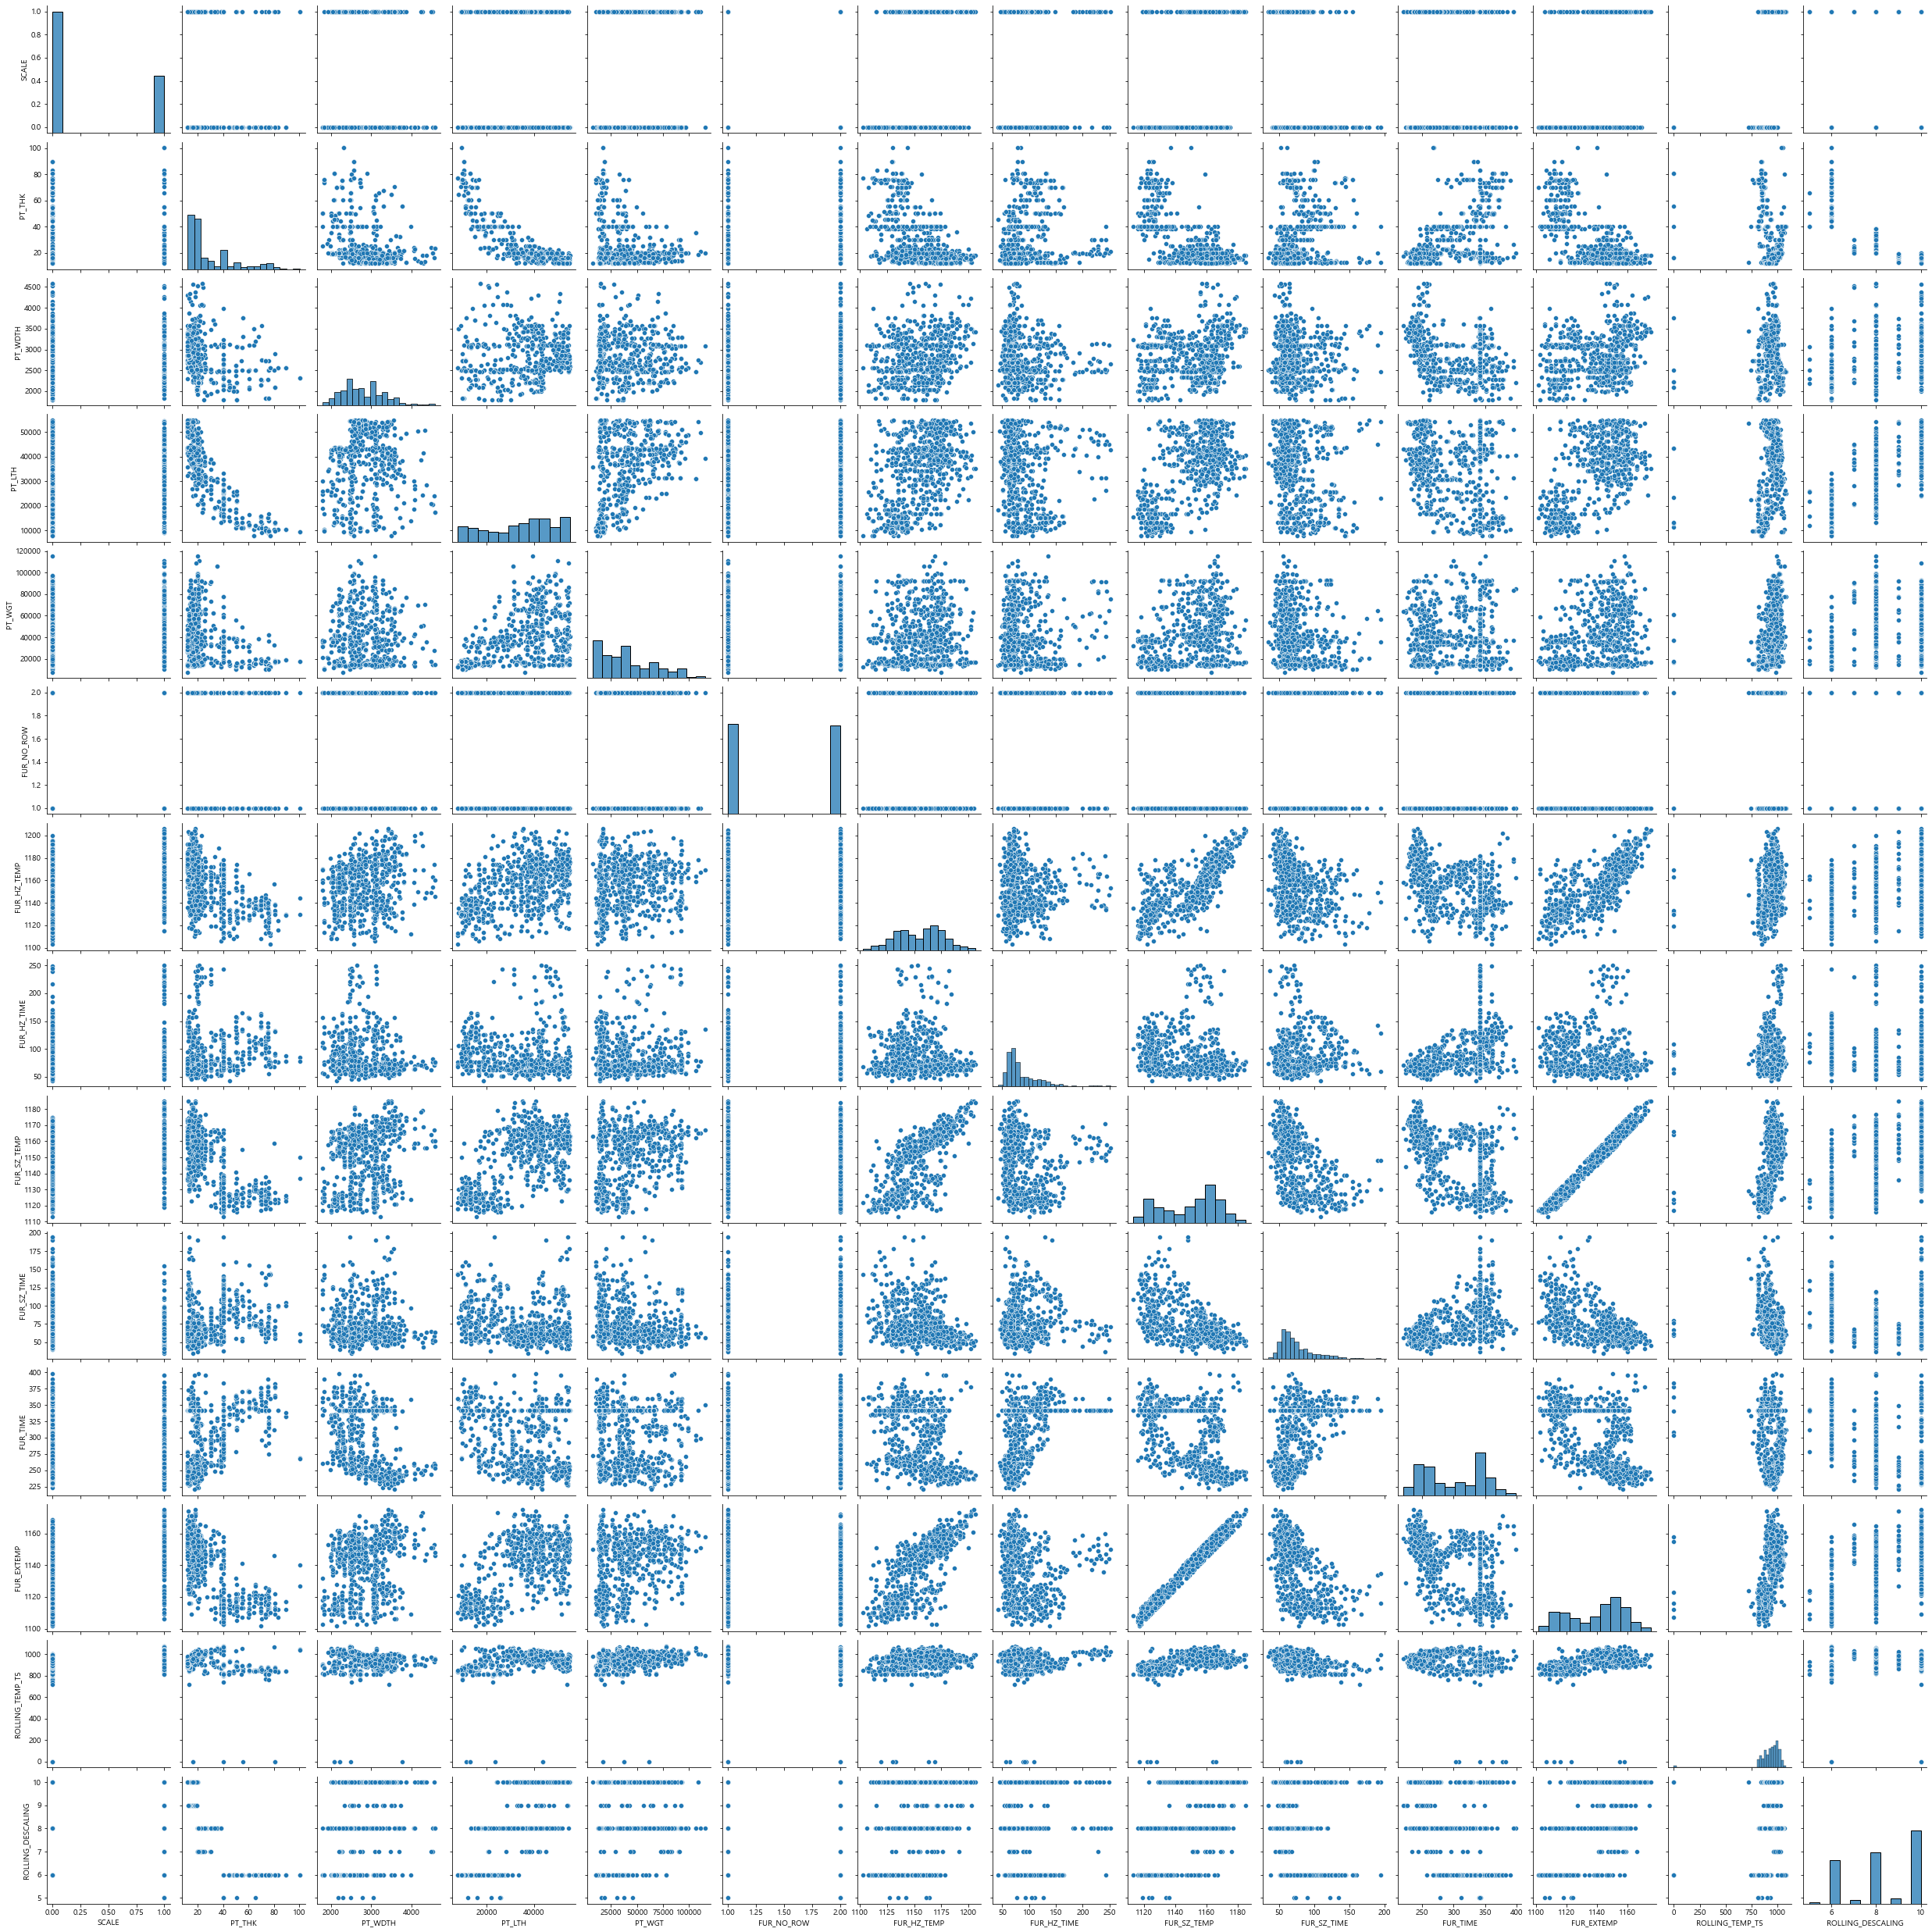

In [29]:
sns.pairplot(df_raw)

In [30]:
df_raw.corr().round(3)

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
PT_THK,1.000,-0.313,-0.863,-0.397,-0.524,0.172,-0.695,0.269,0.413,-0.688,-0.374,-0.837
PT_WDTH,-0.313,1.000,0.120,0.031,0.180,-0.126,0.227,-0.051,-0.393,0.216,-0.022,0.338
PT_LTH,-0.863,0.120,1.000,0.452,0.473,-0.090,0.645,-0.230,-0.252,0.641,0.313,0.809
PT_WGT,-0.397,0.031,0.452,1.000,0.153,0.007,0.360,-0.193,-0.058,0.361,0.263,0.239
FUR_HZ_TEMP,-0.524,0.180,0.473,0.153,1.000,-0.112,0.773,-0.328,-0.348,0.758,0.265,0.471
FUR_HZ_TIME,0.172,-0.126,-0.090,0.007,-0.112,1.000,-0.210,0.068,0.483,-0.196,0.010,-0.152
FUR_SZ_TEMP,-0.695,0.227,0.645,0.360,0.773,-0.210,1.000,-0.566,-0.477,0.985,0.452,0.649
FUR_SZ_TIME,0.269,-0.051,-0.230,-0.193,-0.328,0.068,-0.566,1.000,0.491,-0.566,-0.269,-0.286
FUR_TIME,0.413,-0.393,-0.252,-0.058,-0.348,0.483,-0.477,0.491,1.000,-0.468,-0.199,-0.367
FUR_EXTEMP,-0.688,0.216,0.641,0.361,0.758,-0.196,0.985,-0.566,-0.468,1.000,0.441,0.642


C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Myung-jin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


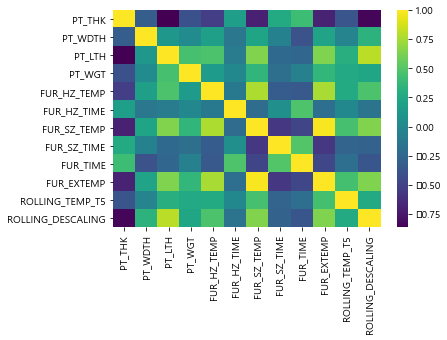

In [31]:
sns.heatmap(df_raw.corr(), cmap = 'viridis')
plt.show()

> 산점도와 히트맵을 보았을 때 가열로 균열대 온도(FUR_SZ_TEMP)와 추출온도(FUR_EXTEMP) 간에 강한 양의 상관관계가 보여 확인해보니 0.985로 두 변수는 서로 연관 되어 있음을 알 수 있다. 그렇다고 인과관계가 보이는 것은 아님을 염두에 둘 것. FUR_SZ_TEMP 삭제
  
> 이 외에도 plate 두께(PT_THK)와 압연온도(ROLLING_TEMP_T5), plate 두께(PT_THK)와 plate 길이(PT_LTH) 역시 강한 음의 선형관계를 보인다.

- 상관계수에 대한 가설 검정

In [32]:
from scipy import stats
stats.pearsonr(df_raw["FUR_SZ_TEMP"], df_raw["FUR_EXTEMP"])

(0.9852447097847143, 0.0)

> pearson 검정을 해보니 p-value가 0으로 유의수준보다 낮음을 알 수 있다. 귀무가설인 "상관관계가 통계적으로 유의하지 않다"는 기각, **"상관 관계가 통계적으로 유의함"** 이 채택되었음을 알 수 있다.

In [33]:
df_raw = df_raw.drop("FUR_SZ_TEMP", axis=1)
df_raw

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1125,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1120,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1106,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,68,316,1113,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,NK-KA,C0,20.14,3580,38639,21870,3호기,1,1172,72,62,245,1155,1005,적용,8,2조
716,0,NV-A32,C0,15.08,3212,48233,18340,2호기,1,1150,61,61,238,1160,947,적용,10,1조
717,0,NV-A32,C0,16.60,3441,43688,19590,2호기,2,1169,65,77,247,1152,948,적용,10,4조
718,0,LR-A,C0,15.59,3363,48740,80240,3호기,2,1179,86,45,243,1154,940,적용,10,2조


## 4. 모델링

### 1) 로지스틱 회귀분석

#### 데이터 전처리

In [34]:
# # FUR_NO 가열호 호기 앞에 숫자만 따오기
# df_raw['FUR_NO'] = df_raw['FUR_NO'].str.get(i=0)

In [35]:
# # HSB 적용 여부 숫자로 바꾸기
# df_raw["HSB"] = np.where(df_raw["HSB"] == "적용", 1, 0)
# df_raw["HSB"] = df_raw["HSB"].astype(object)

In [36]:
# df_raw[['WORK_GR']] = df_raw['WORK_GR'].str.get(i=0)

In [37]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1125,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1120,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1106,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,68,316,1113,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,48,314,1118,873,적용,8,1조


#### 데이터 분할

In [38]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    object 
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TIME        720 non-null    int64  
 12  FUR_TIME           720 non-null    int64  
 13  FUR_EXTEMP         720 non-null    int64  
 14  ROLLING_TEMP_T5    720 non-null    int64  
 15  HSB                720 non-null    object 
 16  ROLLING_DESCALING  720 non

In [60]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

print("train data shape: ", df_train.shape)
print("test data shape: ", df_test.shape)

train data shape:  (504, 18)
test data shape:  (216, 18)


In [61]:
df_train = sm.add_constant(df_train)
df_train.head()

,const,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
95,1.0,0,JS-SM490YB,C0,14.09,3284,51234,93050,2호기,1,1142,75,122,353,1125,913,적용,10,1조
427,1.0,0,COMMON,T8,38.43,3129,16187,15280,3호기,1,1132,63,109,280,1121,876,적용,8,2조
206,1.0,1,JS-SM490A,C0,30.13,2288,30730,33260,2호기,1,1153,74,94,285,1146,1020,적용,8,1조
59,1.0,0,COMMON,T8,65.64,2498,11987,15430,3호기,2,1137,109,73,352,1127,849,적용,6,1조
13,1.0,0,COMMON,T0,30.23,1940,34797,16020,1호기,2,1119,130,65,324,1112,926,적용,8,4조


#### 모델 및 회귀계수 검토

In [81]:
log_model = sm.Logit.from_formula("""SCALE ~ C(SPEC) + C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO)+
                                    FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_TIME + ROLLING_TEMP_T5+
                                    C(HSB) + ROLLING_DESCALING + C(WORK_GR)""", df_train)

# 적합
log_result = log_model.fit(method = 'bfgs')

# 결과 출력
print(log_result.summary())

         Current function value: 0.274569
         Iterations: 35
         Function evaluations: 50
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      424
Method:                           MLE   Df Model:                           79
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.5606
Time:                        03:41:25   Log-Likelihood:                -138.38
converged:                      False   LL-Null:                       -314.97
Covariance Type:            nonrobust   LLR p-value:                 2.572e-36
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.6569    159.952     -0.004

C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> 로지스틱 회귀모델의 설명력은 0.5606이다.  
  
> HSB, WORK_GR, PT_WDTH, ROLLING_TEMP_T5, ROLLING_DESCALING은 유의한 변수이다.

In [65]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.626453,-0.409268,-0.816535,0.000734,-0.19693,AB/EH32-TM,T1,1호기,1,적용,2조
1,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.856618,-0.387221,-1.096730,0.028567,-0.19693,AB/EH32-TM,T1,1호기,2,적용,2조
2,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-0.779897,-0.409268,-1.881276,-0.416748,-0.19693,NV-E36-TM,T8,2호기,1,적용,3조
3,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-0.281206,0.340311,-1.489003,-0.453858,-0.19693,NV-E36-TM,T8,2호기,2,적용,3조
4,-0.687308,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.048422,0.296219,-1.208808,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,1,적용,1조


In [66]:
df_scaled["SCALE"] = np.where(df_scaled["SCALE"]> 0, 1, 0)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.626453,-0.409268,-0.816535,0.000734,-0.19693,AB/EH32-TM,T1,1호기,1,적용,2조
1,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.856618,-0.387221,-1.096730,0.028567,-0.19693,AB/EH32-TM,T1,1호기,2,적용,2조
2,0,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-0.779897,-0.409268,-1.881276,-0.416748,-0.19693,NV-E36-TM,T8,2호기,1,적용,3조
3,0,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-0.281206,0.340311,-1.489003,-0.453858,-0.19693,NV-E36-TM,T8,2호기,2,적용,3조
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.048422,0.296219,-1.208808,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,1,적용,1조


In [67]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                                                   test_size = 0.3, # test 데이터의 비율
                                                   random_state = 1234)  # random state

In [70]:
df_scaled_train = sm.add_constant(df_scaled_train)
df_scaled_train.head()

,const,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
95,1.0,0,-0.793019,0.921528,1.223746,2.084902,-0.639697,-0.364519,1.790278,1.156030,-0.816535,-0.194091,1.036021,JS-SM490YB,C0,2호기,1,적용,1조
427,1.0,0,0.478707,0.621999,-1.312432,-1.059337,-1.119269,-0.695796,1.291587,-0.453361,-1.040691,-0.537354,-0.196930,COMMON,T8,3호기,1,적용,2조
206,1.0,1,0.045046,-1.003184,-0.260027,-0.332406,-0.112167,-0.392126,0.716175,-0.343129,0.360284,0.798590,-0.196930,JS-SM490A,C0,2호기,1,적용,1조
59,1.0,0,1.900386,-0.597372,-1.616365,-1.053273,-0.879483,0.574098,-0.089402,1.133984,-0.704457,-0.787844,-1.429880,COMMON,T8,3호기,2,적용,1조
13,1.0,0,0.050270,-1.675674,0.034282,-1.029419,-1.742713,1.153832,-0.396289,0.516683,-1.545042,-0.073485,-0.196930,COMMON,T0,1호기,2,적용,4조


In [85]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = sm.Logit.from_formula("""SCALE ~ C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO)+
                                    FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_TIME + ROLLING_TEMP_T5+
                                    C(HSB) + ROLLING_DESCALING + C(WORK_GR) """ , df_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit(method = 'bfgs')

# 결과 출력
print(scaled_log_result.summary())

         Current function value: 0.267889
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                           23
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.5713
Time:                        03:42:02   Log-Likelihood:                -135.02
converged:                      False   LL-Null:                       -314.97
Covariance Type:            nonrobust   LLR p-value:                 2.996e-62
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.2715      1.083      3.022      

C:\Users\Myung-jin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> 스케일링한 로지스틱 회귀모델의 설명력은 0.5713이다.  
  
> FUR_NO, HSB, WORK_GR, FUR_HZ_TEMP, ROLLING_TEMP_T5, ROLLING_DESCALING은 유의한 변수이다.

### 2. 의사결정트리

In [92]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    object 
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TIME        720 non-null    int64  
 12  FUR_TIME           720 non-null    int64  
 13  FUR_EXTEMP         720 non-null    int64  
 14  ROLLING_TEMP_T5    720 non-null    int64  
 15  HSB                720 non-null    object 
 16  ROLLING_DESCALING  720 non

In [87]:
df_raw_x = df_raw.drop("SCALE", axis = 1)
df_raw_y = df_raw["SCALE"]

In [97]:
df_raw_dummy = pd.get_dummies(df_raw_x)
df_raw_dummy.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1,FUR_NO_ROW_2,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1144,116,59,282,1125,934,...,0,0,1,0,0,1,0,1,0,0
1,32.25,3707,15109,14180,1144,122,53,283,1120,937,...,0,0,0,1,0,1,0,1,0,0
2,33.27,3619,19181,18130,1129,116,55,282,1106,889,...,1,0,1,0,0,1,0,0,1,0
3,33.27,3619,19181,18130,1152,125,68,316,1113,885,...,1,0,0,1,0,1,0,0,1,0
4,38.33,3098,13334,12430,1140,134,48,314,1118,873,...,0,1,1,0,0,1,1,0,0,0


In [95]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (504, 97)
train data Y size : (504,)
test data X size : (216, 97)
test data Y size : (216,)


In [96]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.954


> 기본 파라미터일 때 훈련 데이터에 대해 정확도가 1, 테스트 데이터에 대해 0.954이다. 즉 이 모델은 훈련 데이터에 대해 과대적합을 보이는 것을 알 수 있다.

#### GridSearchCV를 통해 최적의 파라미터 구하기

In [102]:
para_depth = [depth for depth in range(1, 11)]
para_split = [n_split * 10 for n_split in range(1, 11)]
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

estimator = DecisionTreeClassifier(random_state = 1234)
param_grid = {"max_depth": para_depth,
              "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10,
                       random_state=1234)

best parameter: 
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.944


#### 최종 모델

In [103]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_split=10, min_samples_leaf = 2, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10,
                       random_state=1234)

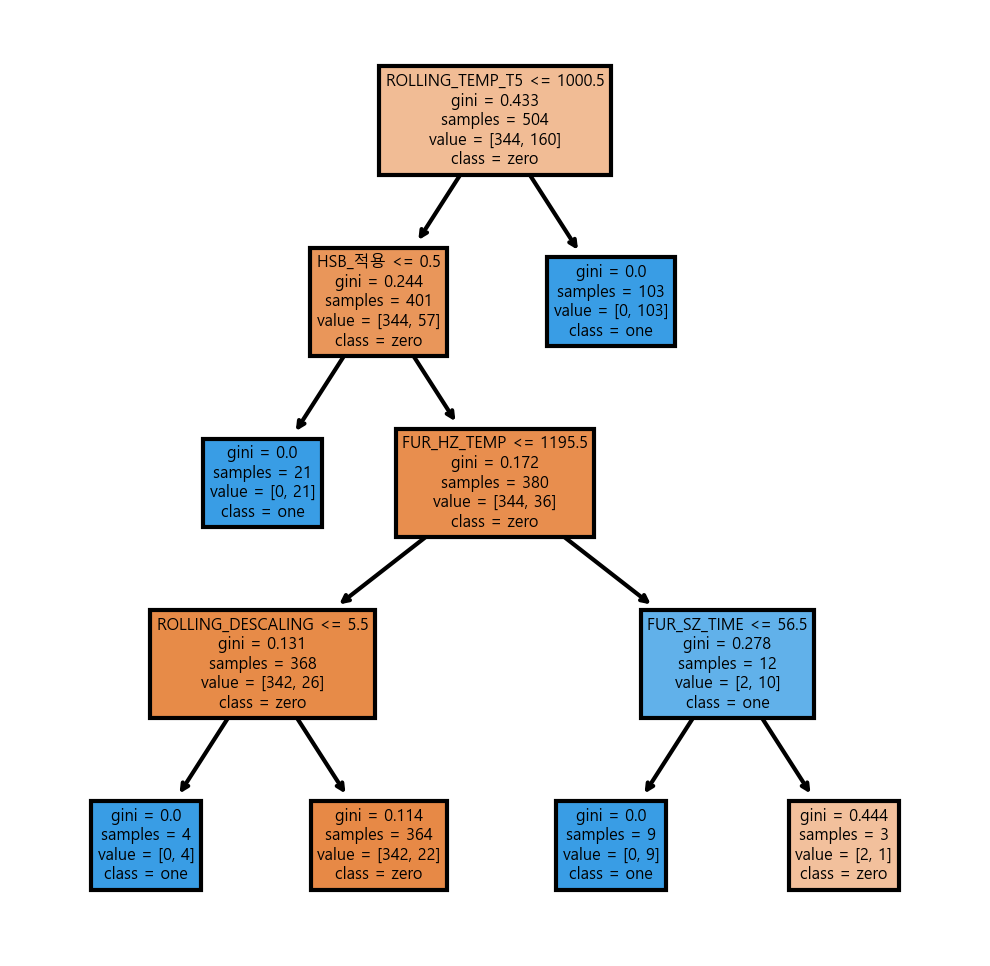

In [105]:
v_feature_name = df_train_x.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, class_names = ["zero", "one"], filled = True);

In [107]:
# 최종 평가
from sklearn.metrics import confusion_matrix
y_pred = tree_final.predict(df_test_x)

print("Train Data Accuracy: {0:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Test Data Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Train Data Accuracy: 0.954

Test Data Accuracy: 0.954

Confusion matrix: 
[[145   0]
 [ 10  61]]


> 의사결정나무를 통해 분류모델을 만든 결과 성능이 매우 좋고 정확도가 0.954로 높은 모델이 생성되었음을 알 수 있다.

#### - 설명변수 중요도 확인

In [108]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.686
92,HSB_적용,0.186
4,FUR_HZ_TEMP,0.077
10,ROLLING_DESCALING,0.040
6,FUR_SZ_TIME,0.011
...,...,...
33,SPEC_GL-A32-TM,0.000
32,SPEC_GL-A32,0.000
31,SPEC_GL-A,0.000
30,SPEC_COMMON,0.000


> 의사결정나무를 모델링하는데 영향을 주는 중요 설명변수는 ROLLING_TEMP_T5, HSB, FUR_HZ_TEMP, ROLLING_DESCALING, FUR_SZ_TIME이다.

### 3. 랜덤 포레스트

In [113]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (504, 97)
train data Y size : (504,)
test data X size : (216, 97)
test data Y size : (216,)


In [114]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.954


#### - n_estimators : 트리 수 변경에 따른 모델 성능

In [115]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# n-estimators
para_n_tree = [n_tree*10 for n_tree in range(1, 14)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.992,0.921
1,20,0.998,0.940
2,30,1.000,0.949
3,40,1.000,0.940
4,50,1.000,0.940
5,60,1.000,0.935
6,70,1.000,0.949
7,80,1.000,0.954
8,90,1.000,0.954
9,100,1.000,0.954


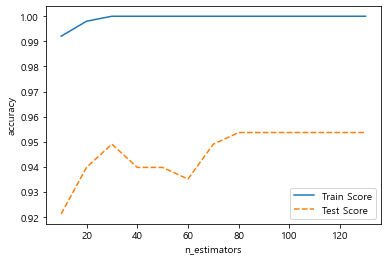

In [116]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label="Train Score")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label= "Test Score")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

In [117]:
oob_error = []

for v_n_estimator in range(1, 101):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means

Text(0.5, 0, 'n_estimators')

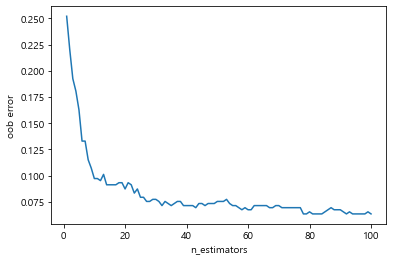

In [118]:
plt.plot(range(1, 101), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

> 생성되는 트리 수가 증가하면 모델의 정확도가 증가하지만 OOB error는 감소한다. 위의 모델 설명력 그래프와 OOB 에러를 다 고려해서 **트리 수를 80을 선택**하였다.

#### - max_depth: 최대 깊이 변경에 따른 정확도 변화

In [121]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# depth
para_depth = [depth for depth in range(1, 21)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators =80, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.683,0.671
1,2,0.843,0.833
2,3,0.907,0.898
3,4,0.929,0.926
4,5,0.942,0.931
5,6,0.942,0.940
6,7,0.952,0.940
7,8,0.968,0.944
8,9,0.976,0.949
9,10,0.984,0.940


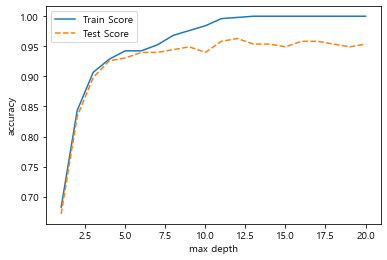

In [122]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label= "Test Score")
plt.ylabel("accuracy"); plt.xlabel("max depth")
plt.legend()

> 최대 깊이가 증가하면서 데이터의 정확도가 증가하고 있다. test 데이터와 train 데이터의 성능을 고려하여 **최대 깊이를 6로 선택**하였다.

#### - min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [123]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split
para_split = [n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split =  v_min_samples_split, max_depth = 6, n_estimators =80, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["split"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,split,TrainAccuracy,TestAccuracy
0,10,0.946,0.940
1,20,0.944,0.935
2,30,0.944,0.940
3,40,0.942,0.935
4,50,0.940,0.940
5,60,0.940,0.931
6,70,0.935,0.931
7,80,0.923,0.931
8,90,0.925,0.917
9,100,0.917,0.917


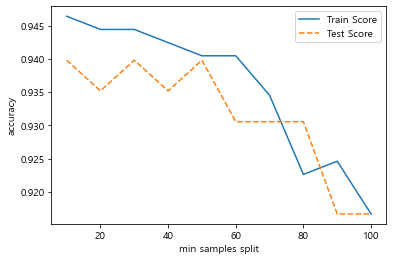

In [124]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label="Train Score")
plt.plot(para_split, test_accuracy, linestyle="--", label= "Test Score")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

> 분리 노드의 최소 자료 수가 증가하면서 데이터의 정확도가 감소한다. 두 데이터의 정확도가 급격하게 하락하므로 성능차가 작은 **30을 선택**하였다.

#### 최종 모델

In [125]:
# 최종 모델
rf_final = RandomForestClassifier(n_estimators=80, min_samples_leaf=30,
                                  max_depth=6, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=30, n_estimators=80,
                       random_state=1234)

#### 최종 모델 시각화

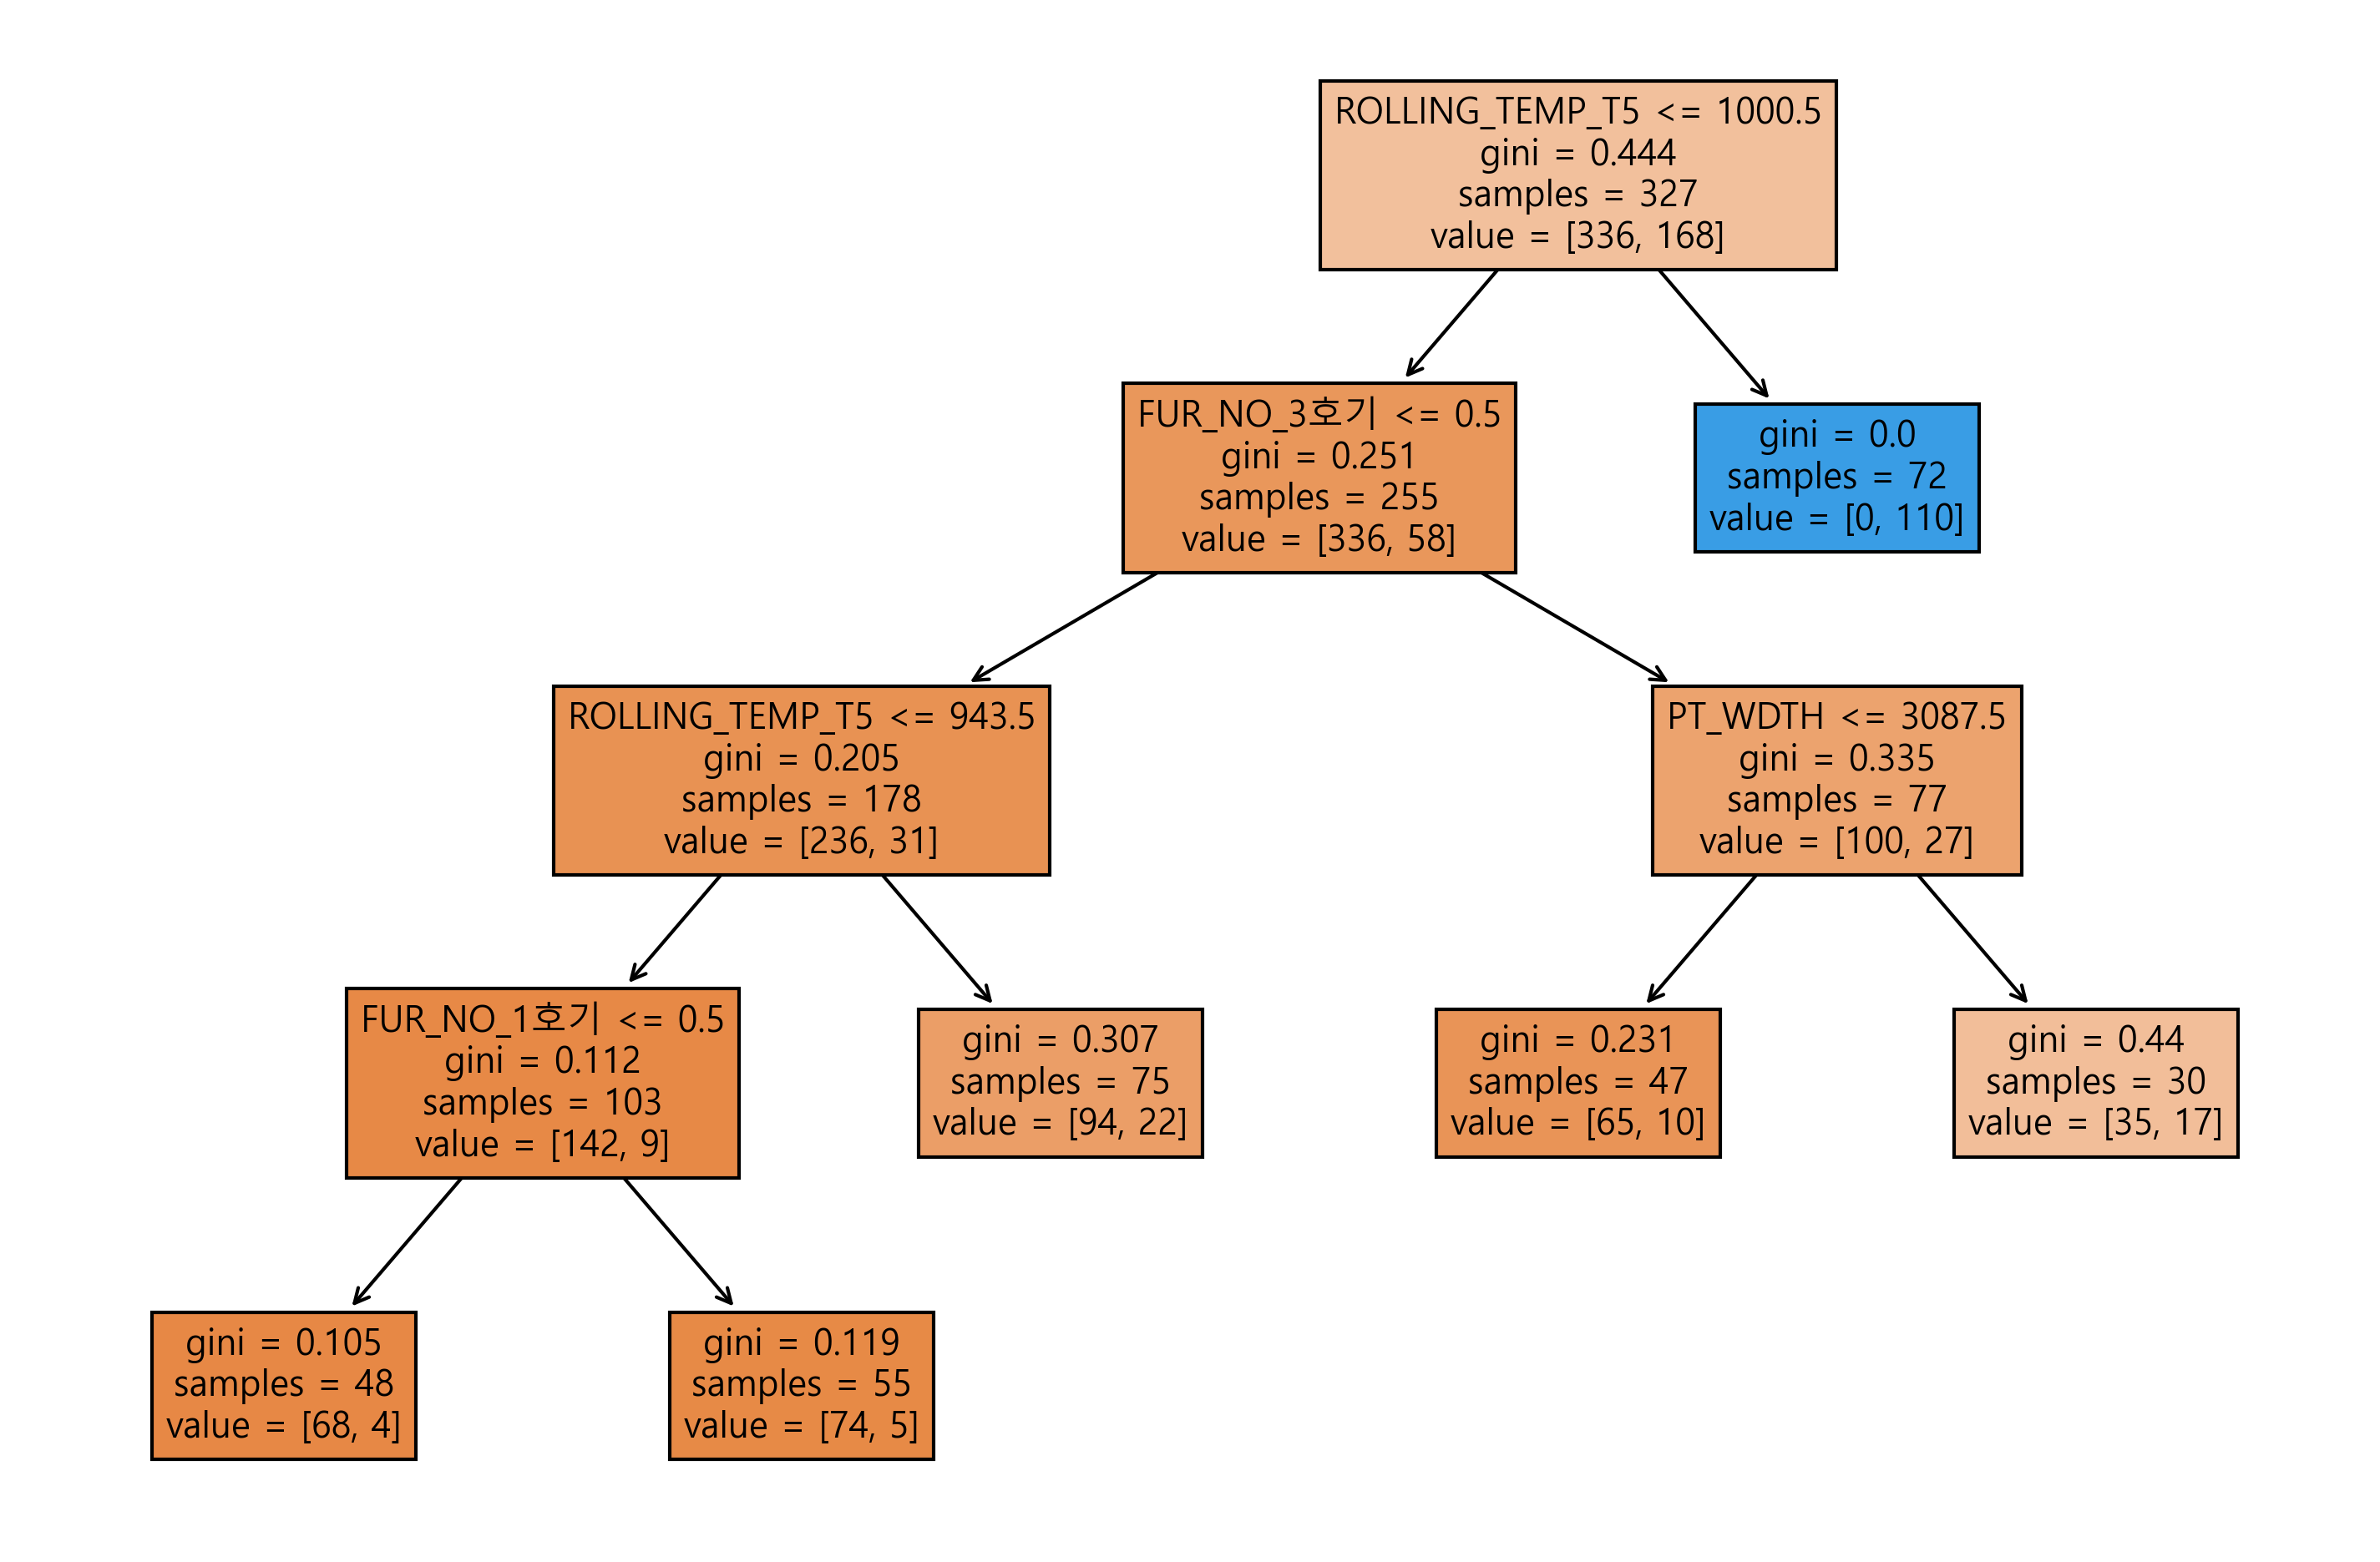

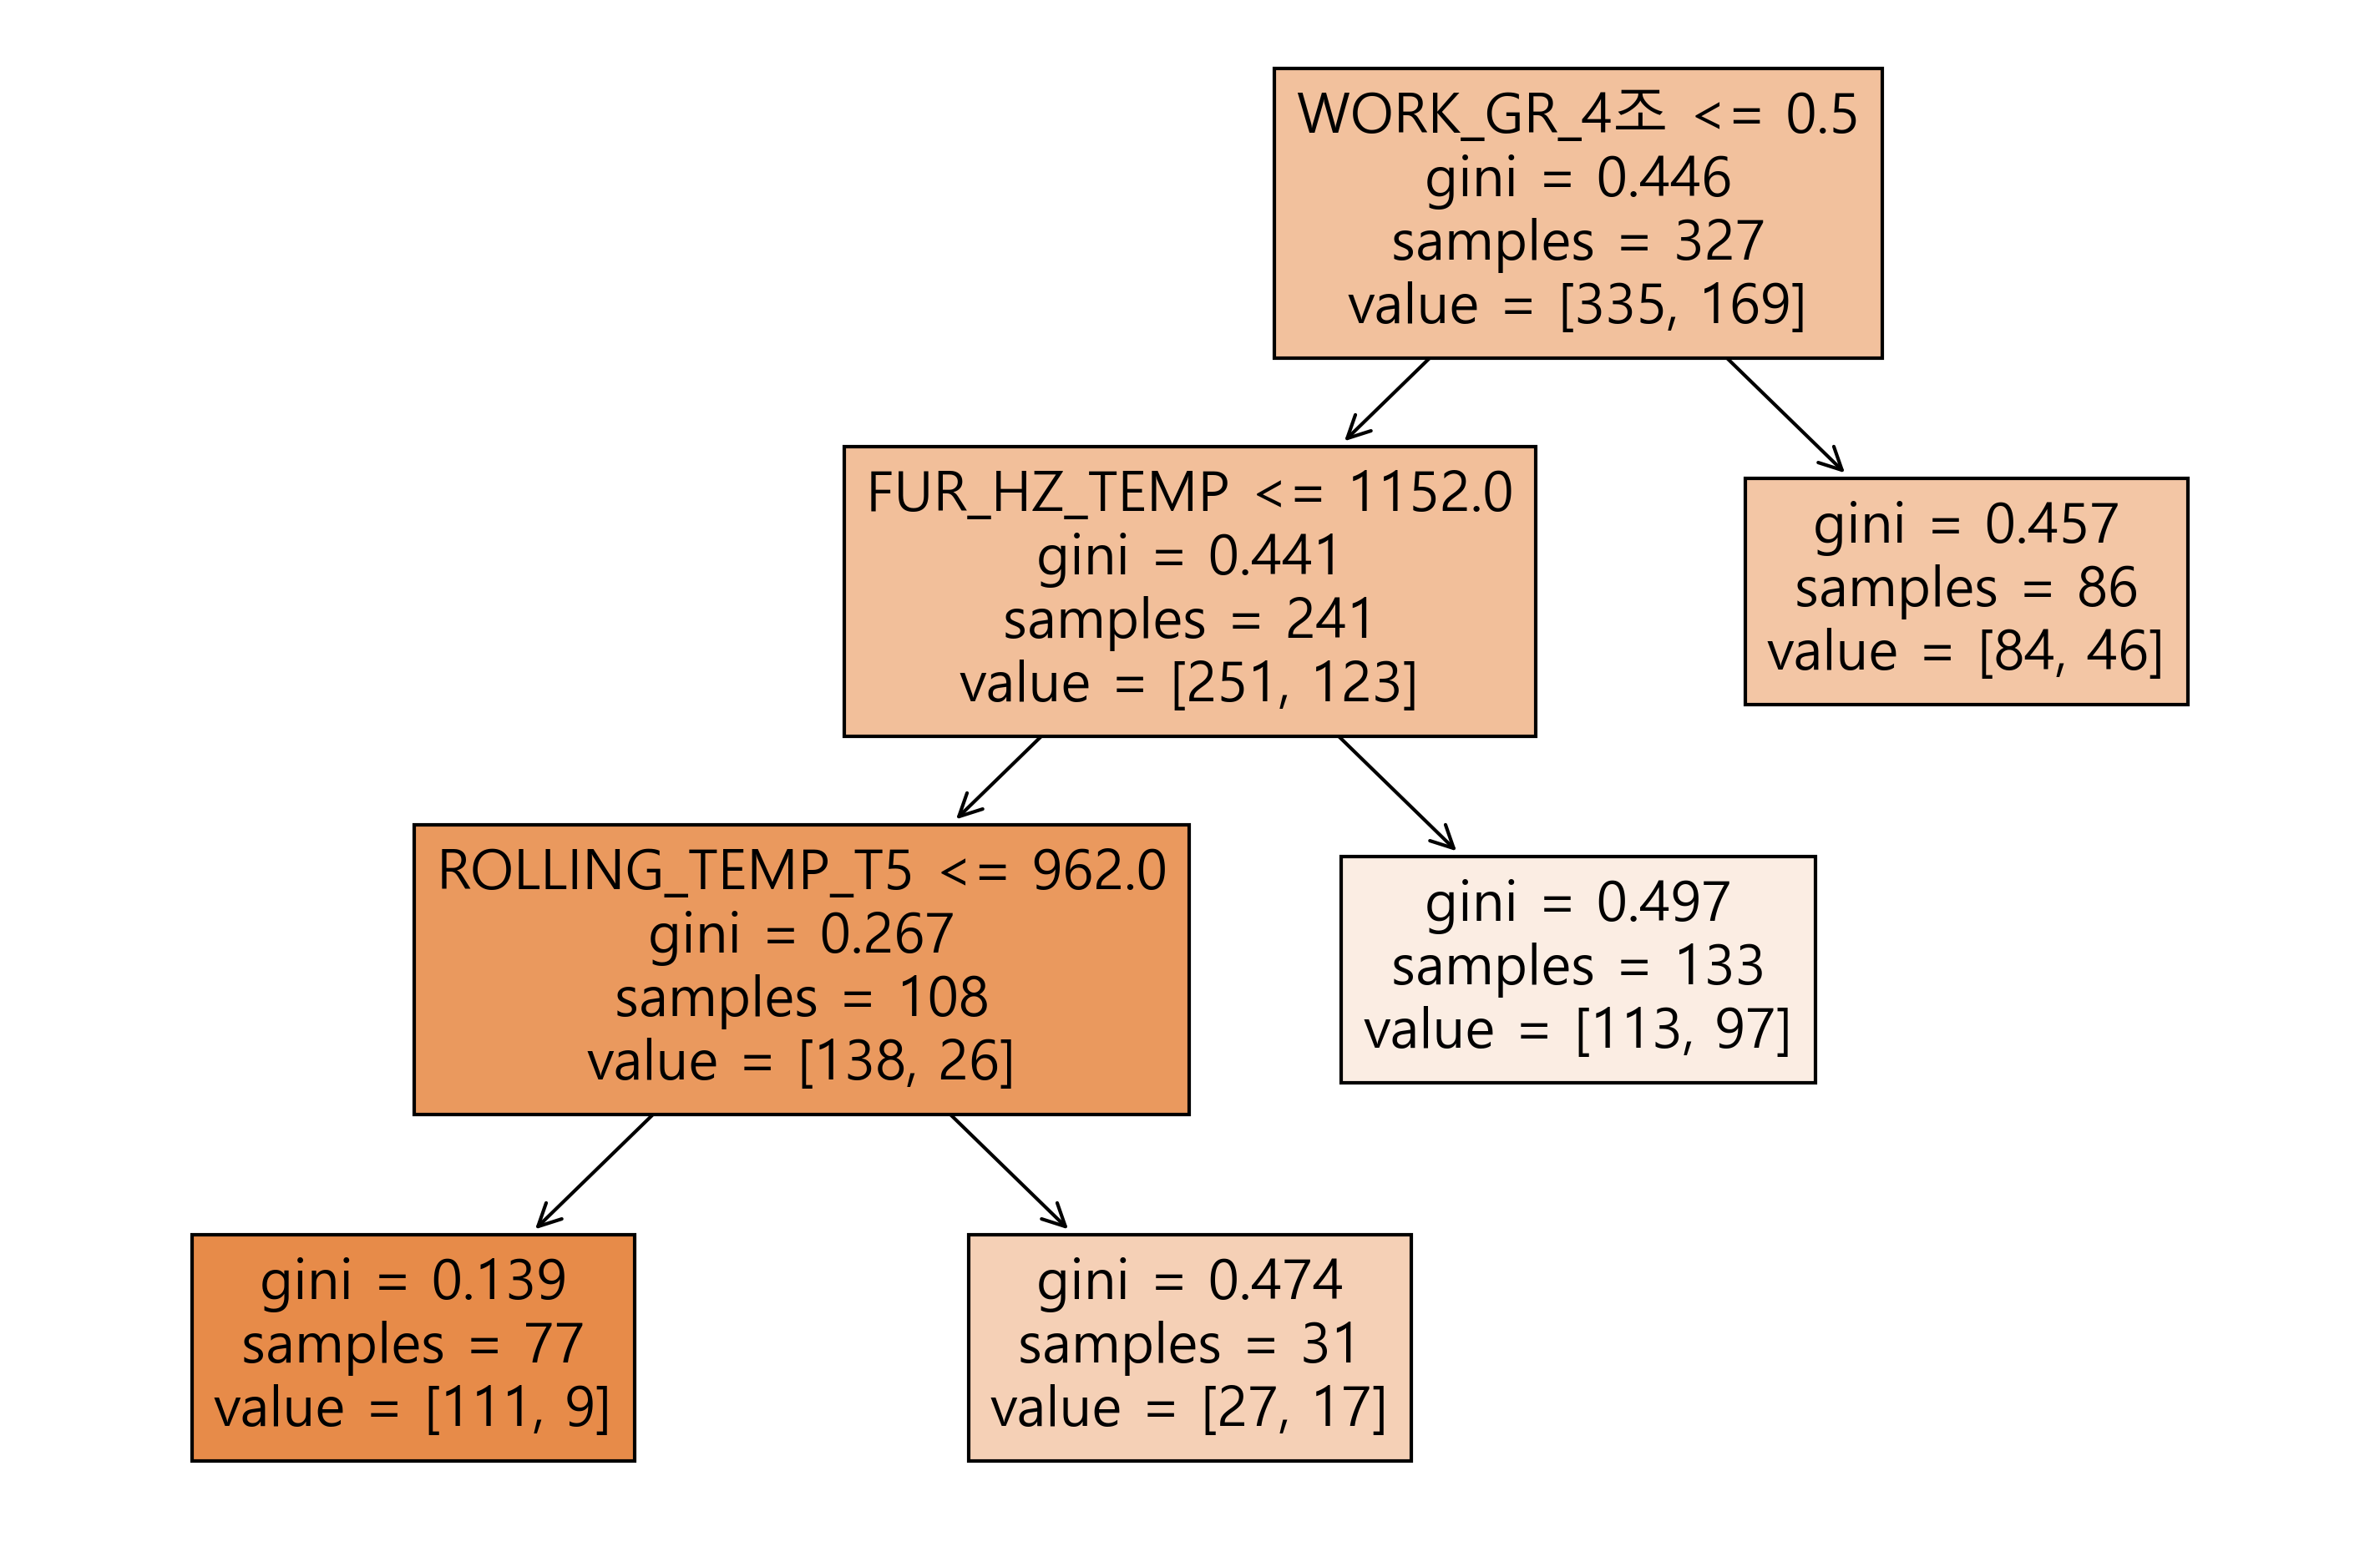

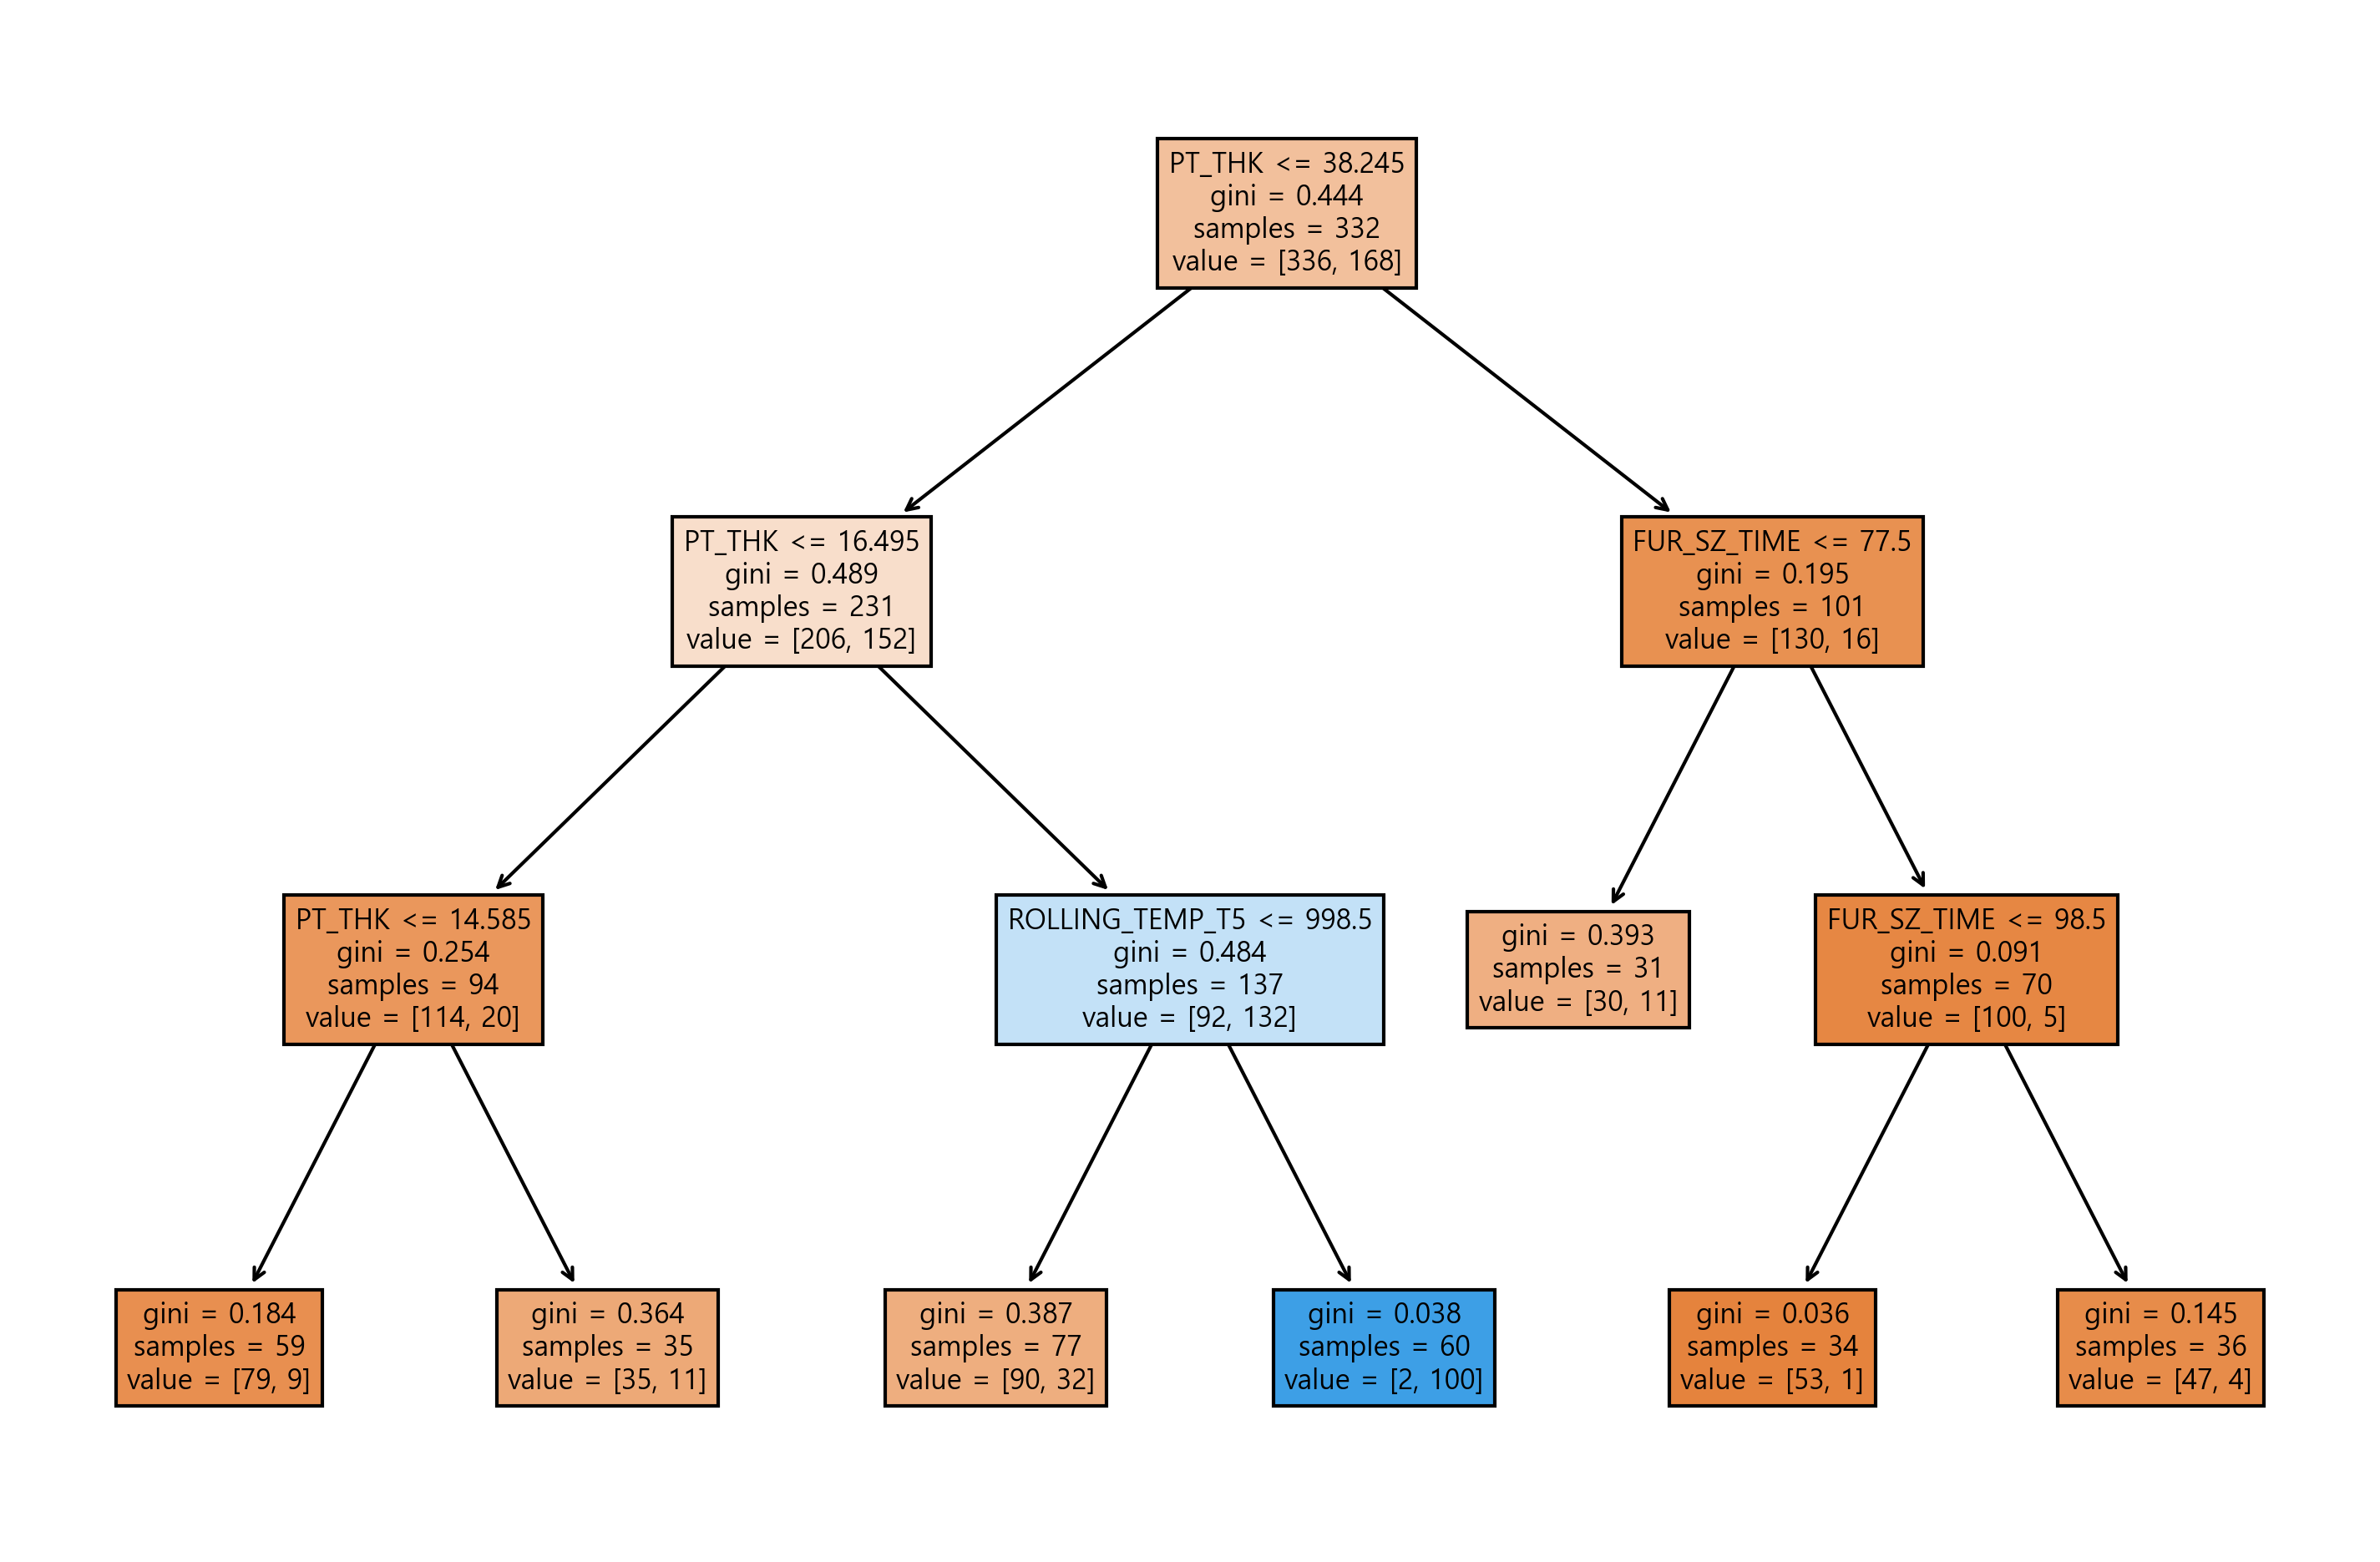

In [126]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[0], feature_names = v_feature_name, filled = True);
# 1번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[1], feature_names = v_feature_name, filled = True);
# 10번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[10], feature_names = v_feature_name, filled = True);

In [127]:
y_pred = rf_final.predict(df_test_x)


# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print()

# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Score on training set : 0.877

Score on test set : 0.880
Confusion matrix: 
[[145   0]
 [ 26  45]]


> 기본 파라미터일 때보다 최종 모델은 테스트, 훈련 데이터 둘 다에서 정확도가 떨어진 것을 알 수 있다. 하지만 과적합을 방지할 수 있었고 성능 차가 작아졌다는 것은 좋은 의미로 모델링이 이뤄졌다고 생각한다.

#### - 설명변수의 중요도

In [128]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.261
8,FUR_EXTEMP,0.133
0,PT_THK,0.092
77,STEEL_KIND_C0,0.091
6,FUR_SZ_TIME,0.080
...,...,...
45,SPEC_KR-AH32,0.000
44,SPEC_KR-A,0.000
43,SPEC_JS-SS400,0.000
41,SPEC_JS-SM490YA,0.000


> 랜덤 포레스트를 모델링하는데 영향을 주는 중요 설명변수는 ROLLING_TEMP_T5, FUR_EXTEMP, PT_THK, STEEL_KIND_C0, FUR_SZ_TIME이다.

### 4. 그래디언트 부스팅

In [129]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, df_raw_y,
                                                               test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (504, 97)
train data Y size : (504,)
test data X size : (216, 97)
test data Y size : (216,)


In [130]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.991


> 기본 파라미터로 모델 생성 시 훈련 데이터와 테스트 데이터에 대해 정확도가 높지만 훈련 데이터에 대해 과적합을 보인다.

#### 최종 모델 선택

In [156]:
gb_final = GradientBoostingClassifier(min_samples_leaf=10 , max_depth=4 , n_estimators=100 ,
                                     learning_rate =0.1 , random_state=1234)
gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Score on training set : 1.000
Score on test set : 0.981
Confusion matrix: 
[[145   0]
 [  4  67]]


#### 설명변수의 중요도

In [157]:
# 변수명 저장
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.611
91,HSB_미적용,0.092
92,HSB_적용,0.067
10,ROLLING_DESCALING,0.057
4,FUR_HZ_TEMP,0.053
...,...,...
41,SPEC_JS-SM490YA,0.000
40,SPEC_JS-SM490A,0.000
39,SPEC_JS-SM400B,0.000
38,SPEC_JS-SM400A,0.000


> 그래디언트 부스팅 모델을 생성하는데 가장 영향이 있는 인자는 ROLLING_TEMP_T5, HSB, ROLLING_DESCALING, FUR_HZ_TEMP이다.

## 5. 변수 중요도 높은 인자 확인

- 이 때까지 분석모델 생성을 통해 변수 중요도가 높은 공통인자를 정리해보자.  

FUR_NO, HSB, WORK_GR, FUR_HZ_TEMP, ROLLING_TEMP_T5, ROLLING_DESCALING  
ROLLING_TEMP_T5, HSB, FUR_HZ_TEMP, ROLLING_DESCALING, FUR_SZ_TIME  
ROLLING_TEMP_T5, FUR_EXTEMP, PT_THK, STEEL_KIND_C0, FUR_SZ_TIME  
ROLLING_TEMP_T5, HSB, ROLLING_DESCALING, FUR_HZ_TEMP  
  
> 공통적으로 4개의 모델에서 3번 이상 중요도가 높은 인자로 선택된 **ROLLING_TEMP_T5, HSB, FUR_HZ_TEMP, ROLLING_DESCALING**이다.

## 6. 모델 평가

In [158]:
# 회귀분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [159]:
matplotlib.rc("font", family = "Malgun Gothic")

In [160]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [172]:
df_new = df_raw[["SCALE", "ROLLING_TEMP_T5", "HSB", "FUR_HZ_TEMP", "ROLLING_DESCALING"]]
df_new_x = df_new.drop("SCALE", axis = 1)
df_new_dummy = pd.get_dummies(df_new_x)
df_new_y = df_new["SCALE"]

In [173]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_new_dummy, df_new_y,
                                                               test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (504, 5)
train data Y size : (504,)
test data X size : (216, 5)
test data Y size : (216,)
